In [1]:
# Importing Data Manipulation Libraries
import pandas as pd
import numpy as np
# Import Data Visualization Libraries
import seaborn as sns 
import matplotlib.pyplot as plt 
# Import Filter Warning Libraries
import warnings
warnings.filterwarnings('ignore')


In [2]:
url1 = 'https://raw.githubusercontent.com/mukeshmagar543/Telecom-Churn-Dataset/refs/heads/main/churn-bigml-80.csv'
url2 = 'https://raw.githubusercontent.com/mukeshmagar543/Telecom-Churn-Dataset/refs/heads/main/churn-bigml-20.csv'

df1 = pd.read_csv(url1)
df2 = pd.read_csv(url2)

df = pd.concat([df1, df2], axis=0, ignore_index=True)

df.sample(frac= 1)


,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
1650,AK,132,510,No,No,0,181.1,121,30.79,314.4,109,26.72,246.7,81,11.10,4.2,9,1.13,2,False
3117,FL,31,510,No,No,0,165.4,84,28.12,203.7,107,17.31,201.7,65,9.08,8.2,1,2.21,1,False
2801,SD,65,408,No,Yes,31,282.3,70,47.99,152.0,89,12.92,225.5,93,10.15,12.0,4,3.24,1,False
647,MN,80,415,No,No,0,105.8,110,17.99,43.9,88,3.73,189.6,87,8.53,13.1,5,3.54,0,False
1480,MD,123,408,No,No,0,206.9,115,35.17,224.4,86,19.07,197.4,60,8.88,8.3,2,2.24,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1600,OR,92,415,No,No,0,196.5,82,33.41,190.0,89,16.15,163.2,99,7.34,10.8,2,2.92,2,False
2502,WV,102,408,No,No,0,234.8,125,39.92,199.2,99,16.93,163.2,88,7.34,10.0,1,2.70,4,False
333,TX,145,415,No,No,0,187.9,110,31.94,197.0,117,16.75,167.0,108,7.52,4.8,4,1.30,2,False
2841,SC,87,408,No,No,0,322.5,106,54.83,204.6,93,17.39,186.2,128,8.38,9.4,4,2.54,2,True


In [3]:
# Checking Dataset Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [4]:
# Split the Dataset into Numerical_Data and Categorical_Data
Numerical_Data = df.select_dtypes(exclude=['object', 'bool'])

Categorical_Data = df.select_dtypes(include = ['object', 'bool'])

In [5]:
# Checking Numerical_Data
Numerical_Data

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,114,415,26,137.1,88,23.31,155.7,125,13.23,247.6,94,11.14,11.5,7,3.11,2
3329,106,408,29,83.6,131,14.21,203.9,131,17.33,229.5,73,10.33,8.1,3,2.19,1
3330,60,415,0,193.9,118,32.96,85.0,110,7.23,210.1,134,9.45,13.2,8,3.56,3
3331,159,415,0,169.8,114,28.87,197.7,105,16.80,193.7,82,8.72,11.6,4,3.13,1


In [6]:
# Checking Categorical_Data
Categorical_Data

,State,International plan,Voice mail plan,Churn
0,KS,No,Yes,False
1,OH,No,Yes,False
2,NJ,No,No,False
3,OH,Yes,No,False
4,OK,Yes,No,False
...,...,...,...,...
3328,WI,No,Yes,False
3329,AL,No,Yes,False
3330,VT,No,No,False
3331,WV,No,No,False


In [7]:
# Checking Descriptive Stats : Numerical_Data and Categorical_Data
# Univariate Analysis
from collections import OrderedDict

stats = []

for i in Numerical_Data:
    numerical_stats = OrderedDict({
        'Feature' : i,
        'Maximum' : Numerical_Data[i].max(),
        'Minimum' : Numerical_Data[i].min(),
        'Mean' : Numerical_Data[i].mean(),
        "25%" : Numerical_Data[i].quantile(0.25),
        'Median' : Numerical_Data[i].quantile(0.50),
        '75%' : Numerical_Data[i].quantile(0.75),
        'Kurtosis' : Numerical_Data[i].kurt(),
        "Skewness" : Numerical_Data[i].skew(),
        'Standard Deviation' : Numerical_Data[i].std()
    })

    stats.append(numerical_stats)

    report = pd.DataFrame(stats)

report

,Feature,Maximum,Minimum,Mean,25%,Median,75%,Kurtosis,Skewness,Standard Deviation
0,Account length,243.00,1.00,101.064806,74.00,101.00,127.00,-0.107836,0.096606,39.822106
1,Area code,510.00,408.00,437.182418,408.00,415.00,510.00,-0.705632,1.126823,42.371290
2,Number vmail messages,51.00,0.00,8.099010,0.00,0.00,20.00,-0.051129,1.264824,13.688365
3,Total day minutes,350.80,0.00,179.775098,143.70,179.40,216.40,-0.019940,-0.029077,54.467389
4,Total day calls,165.00,0.00,100.435644,87.00,101.00,114.00,0.243182,-0.111787,20.069084
5,Total day charge,59.64,0.00,30.562307,24.43,30.50,36.79,-0.019812,-0.029083,9.259435
6,Total eve minutes,363.70,0.00,200.980348,166.60,201.40,235.30,0.025630,-0.023877,50.713844
7,Total eve calls,170.00,0.00,100.114311,87.00,100.00,114.00,0.206156,-0.055563,19.922625
8,Total eve charge,30.91,0.00,17.083540,14.16,17.12,20.00,0.025487,-0.023858,4.310668
9,Total night minutes,395.00,23.20,200.872037,167.00,201.20,235.30,0.085816,0.008921,50.573847


In [8]:
# Checking missing information if any 
df.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [9]:
# Checking Output  i.e. Target Column for Data Distribution
df['Churn'].value_counts()

Churn
False    2850
True      483
Name: count, dtype: int64

In [10]:
# Encoding Target Column
df['Churn'] = df['Churn'].astype(int)

In [11]:

df['International plan'] = df['International plan'].replace({'No': 0,'Yes': 1})
df['Voice mail plan'] = df['Voice mail plan'].replace({'No': 0,'Yes': 1})

In [12]:
# Using Label Encoding Technique
from sklearn.preprocessing import LabelEncoder
df['State'] = LabelEncoder().fit_transform(df['State'])
df

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,16,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,48,114,415,0,1,26,137.1,88,23.31,155.7,125,13.23,247.6,94,11.14,11.5,7,3.11,2,0
3329,1,106,408,0,1,29,83.6,131,14.21,203.9,131,17.33,229.5,73,10.33,8.1,3,2.19,1,0
3330,46,60,415,0,0,0,193.9,118,32.96,85.0,110,7.23,210.1,134,9.45,13.2,8,3.56,3,0
3331,49,159,415,0,0,0,169.8,114,28.87,197.7,105,16.80,193.7,82,8.72,11.6,4,3.13,1,0


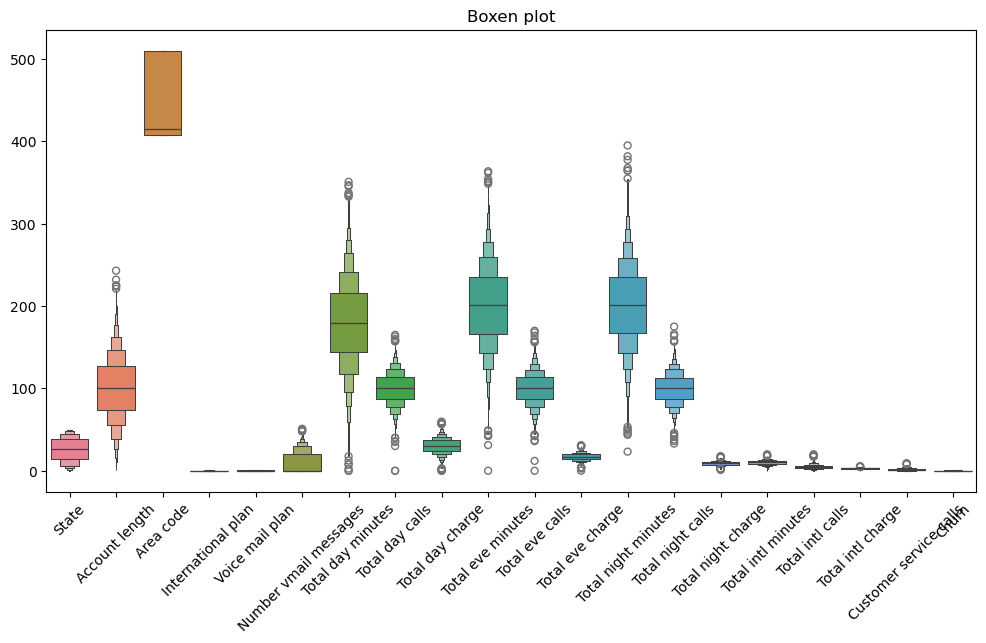

In [18]:
plt.figure(figsize=(12, 6))
sns.boxenplot(data=df)
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.title('Boxen plot')
plt.show()

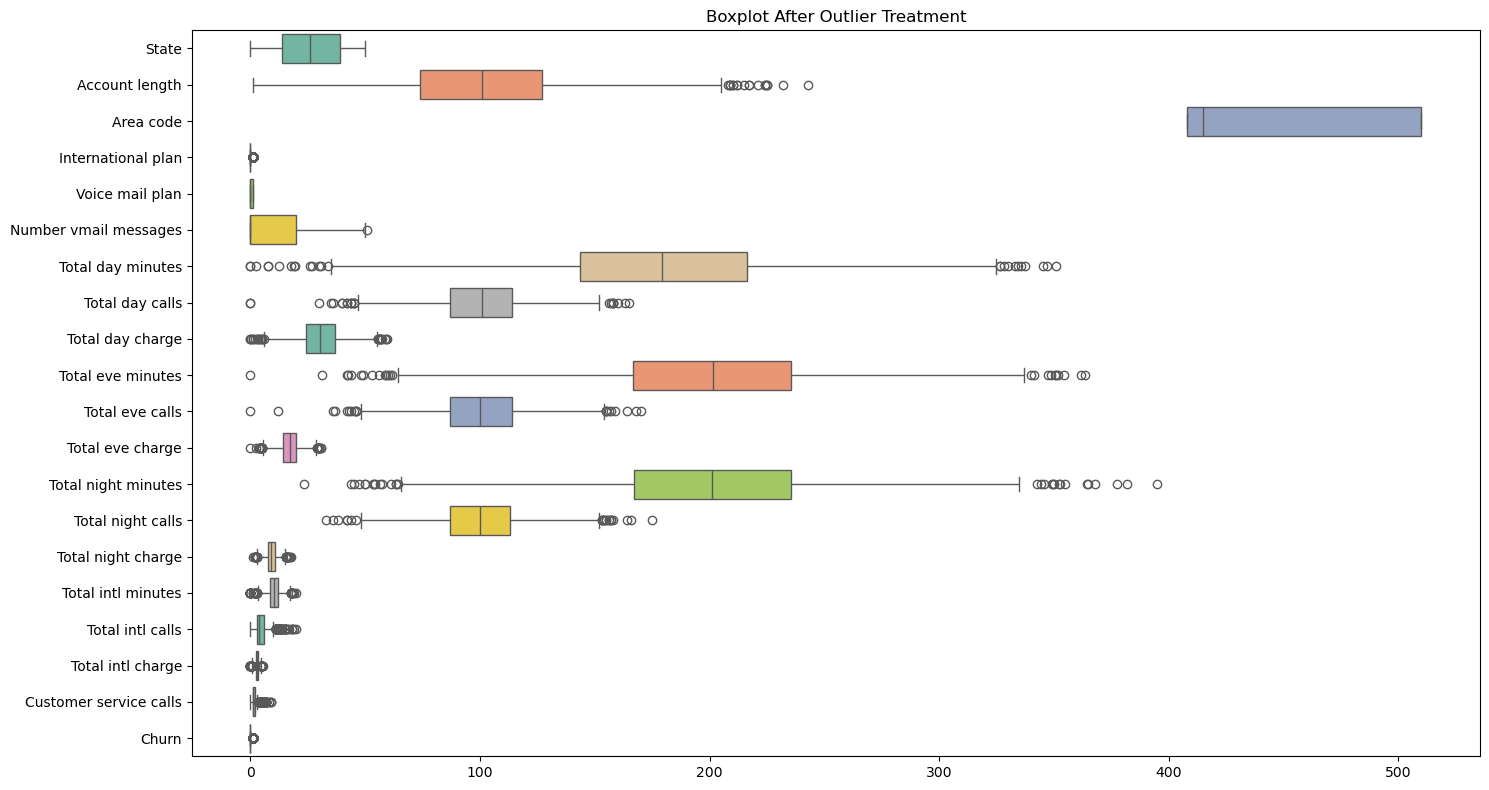

In [19]:
# Set figure size
plt.figure(figsize=(15, 8))

# Create boxplot for all numerical columns
sns.boxplot(data=df, orient='h', palette='Set2')

# Set title
plt.title('Boxplot After Outlier Treatment')
plt.tight_layout()
plt.show()

In [20]:
# Step 1 : Divide Dataset into x and y

# X : Independant Column and y : Target Column

X = df.drop(columns = 'Churn')  # Independant Column : 16

y =df['Churn']  # Target Column : 1

# Step 2 : Split the Dataset into Train and Test
# 100% -----> 80% Data is used for Training [Seen Data] and 20% Data [Unseen Data] is used for Testing
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20,random_state = 7)

# Step 3 : Normalization Scaling Technique
from sklearn.preprocessing import MinMaxScaler

scalar = MinMaxScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

# Step 4 : Using SMOTE Technique to Balance Target Column

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train,y_train = sm.fit_resample(X_train,y_train)



In [21]:
# Step 5 : Import Model Preprocessing Library from Sklearn
from sklearn.linear_model import LogisticRegression
# Implement Logestic Regression to our Binary Classification Model
# clf = LogisticRegression(random_state=0).fit(X,y)
LR = LogisticRegression()
# Fit the Model on Training Dataset
LR.fit(X_train,y_train)

# Predict the Value Based on Test Dataset
y_pred = LR.predict(X_test)

# Step 6: Use Matrics to evaluate Model Performances
from sklearn.metrics import accuracy_score,classification_report

accuracy_score_LR = accuracy_score(y_test,y_pred)
accuracy_score_LR

0.7796101949025487

In [23]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)

y_pred_DT = DT.predict(X_test)

accuracy_score_DT = accuracy_score(y_pred_DT, y_test)
accuracy_score_DT
# print(f'Accuracy : {round(accuracy_score_DT * 100,2)}%')

0.889055472263868

In [27]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()

RF.fit(X_train,y_train)

y_pred_RF = RF.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_score_RF = accuracy_score(y_pred_RF,y_test)
accuracy_score_RF
# print(f'Accuracy : {round(accuracy_score_RF * 100,2)}%')

0.9415292353823088

In [25]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(RF, X_train, y_train, cv= 10, scoring= 'accuracy')

print('Accuracy for each fold : ', scores)
print('Average Accuracy across 10 folds : ', np.mean(scores))

Accuracy for each fold :  [0.92951542 0.94713656 0.97136564 0.98017621 0.97136564 0.94933921
 0.97577093 0.95594714 0.95814978 0.96255507]
Average Accuracy across 10 folds :  0.9601321585903083
